DECISION TREE MODEL FOR DIABETES PREDICTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
#STEP-1 LOAD DATASET

df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# STEP-2 DATA EXPLORATION
df.isnull().sum() # to check missing values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

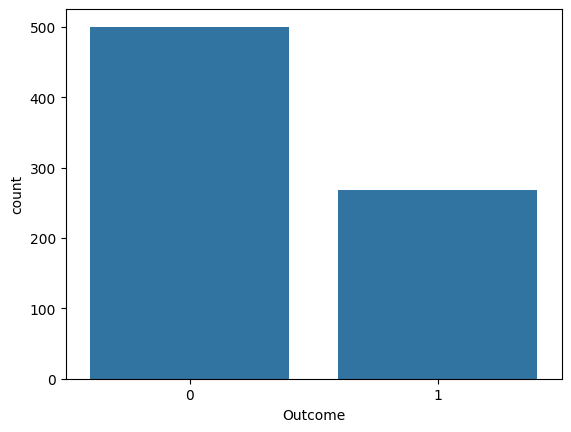

In [5]:
# check for imbalance 
sns.countplot(x="Outcome", data = df)
plt.show()

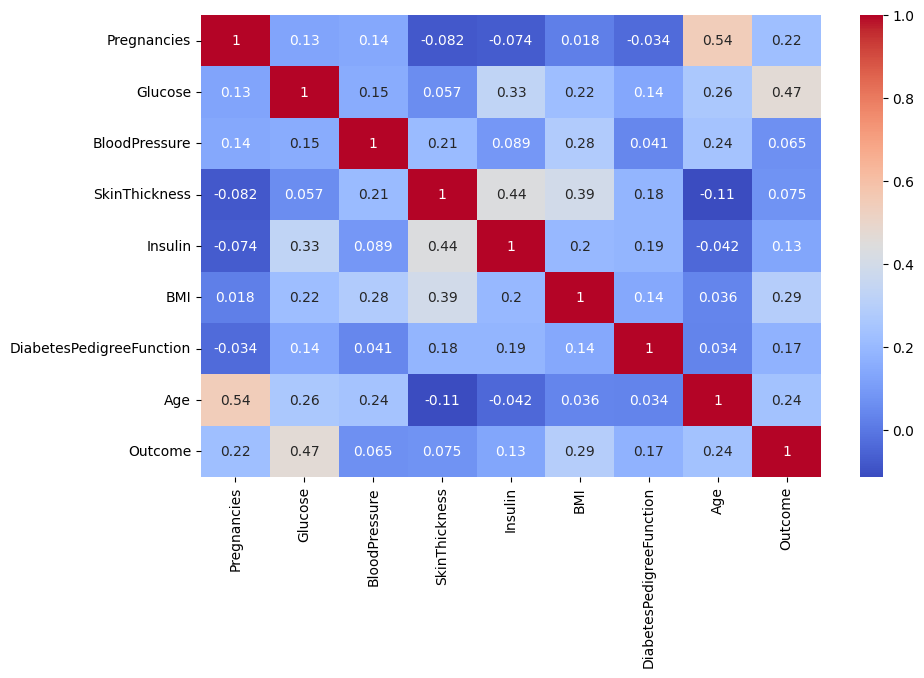

In [ ]:
# Correlation heatmap:: to see how features relate to each other and to the target(outcome)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()
# r value between -1 and +1
# +1 =  perfect positive correlation, one increases, other also increases
# -1 = perfect negative correlation, one increases, other decreases
# 0 = no correlation

# use of heatmap: feature selection

In [14]:
#STEP-3 TRAIN-TEST SPLIT
x= df.drop("Outcome", axis=1)
y= df["Outcome"]

x_train, x_test ,y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)# random state= shuffles data before spliting

In [15]:
#STEP-4 BUILD A DECISION TREE
dt = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
dt.fit(x_train,y_train)
# criterion= decides how the tree chooses to split, by-default, options: gini and entropy, used gini because it is slightly faster
#max-depth = controls how deep the tree can grow, if the tree is too deep -> overfitting, else -> underfiting


DecisionTreeClassifier(max_depth=4, random_state=42)

In [16]:
y_pred = dt.predict(x_test)


In [ ]:
#STEP-6 EVALUATION
# ACCURACY SCORE=Measures the overall % of correct predictions.
print(accuracy_score(y_test,y_pred))

0.70995670995671


In [ ]:
# CLASSIFICATION REPORT=Gives Precision, Recall, F1-score for each class.
#Precision = TP / (TP + FP) Out of predicted diabetics, how many are actually diabetic?
#Recall (Sensitivity) = TP / (TP + FN) Out of actual diabetics, how many did we correctly detect?
#F1-score = Harmonic mean of Precision & Recall.Balanced measure when classes are imbalanced.
#Support = Number of samples in each class.

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.75       151
           1       0.56      0.78      0.65        80

    accuracy                           0.71       231
   macro avg       0.70      0.73      0.70       231
weighted avg       0.75      0.71      0.72       231



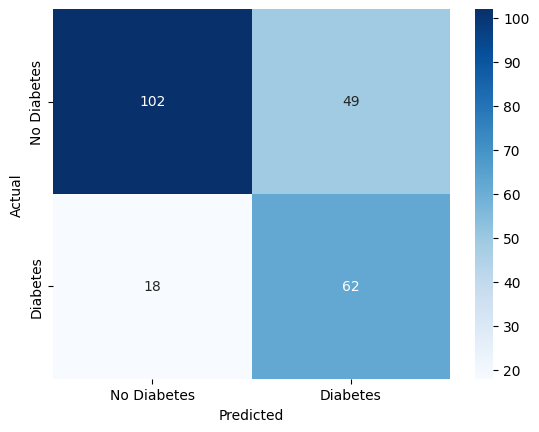

In [ ]:
#CONFUSION MATRIX= Shows how predictions are distributed across classes. SHOWS EXACTLY WHERE THE MODEL IS MAKING MISTAKES
# TN,FP,,FN,FP
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

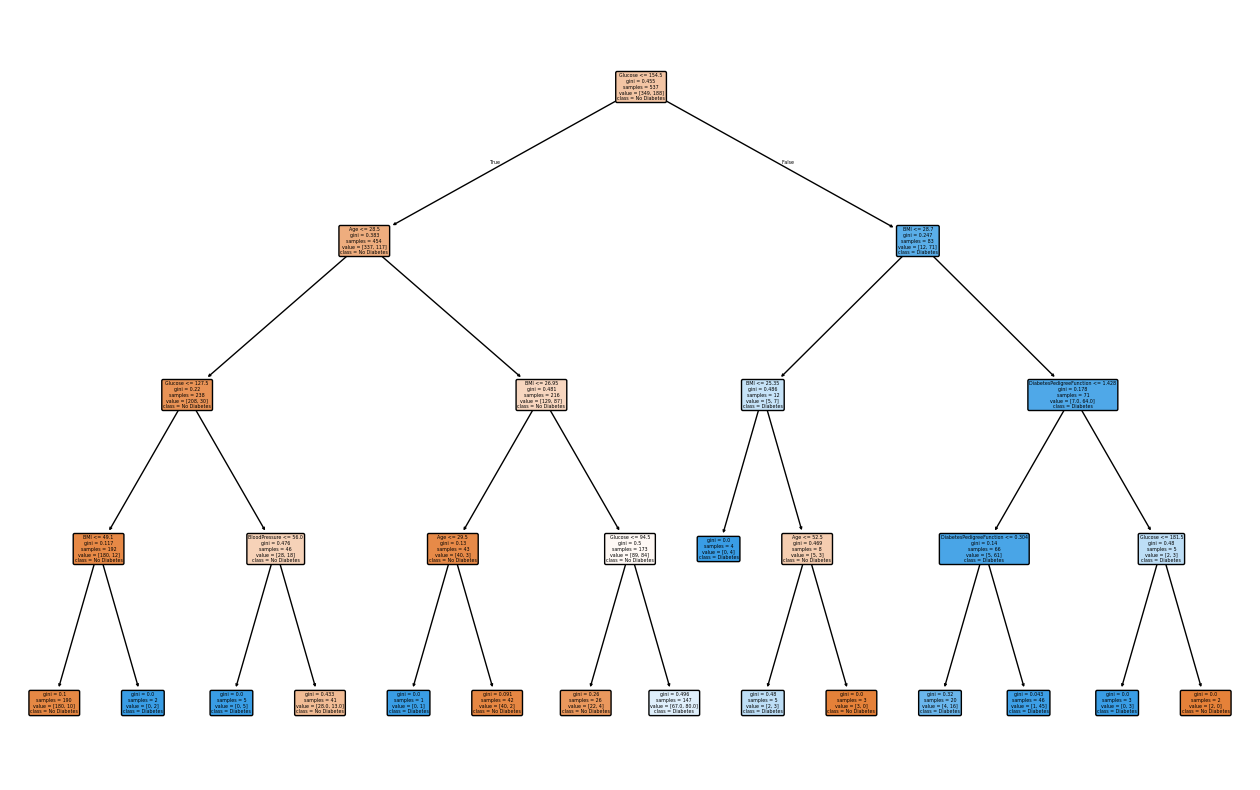

In [21]:
#STEP-6 VISUALIZE DECISION TREE
plt.figure(figsize=(16,10))
plot_tree(dt, feature_names=x.columns, class_names=["No Diabetes","Diabetes"],
          filled=True, rounded=True)
plt.show()


HYPERPARAMETER TUNING

In [ ]:
#n Decision Trees, hyperparameters (like max_depth, criterion, min_samples_split) control how the tree grows.
#Instead of guessing values, we’ll use GridSearchCV (exhaustive search) or RandomizedSearchCV (faster random search) to find the best combo.

In [22]:
#STEP-1 IMPORT TUNING TOOLS
from sklearn.model_selection import GridSearchCV


In [23]:
#STEP-2 DEFINE PARAMETER GRID
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [3, 5, 7, None],  # limit depth or let it grow
    "min_samples_split": [2, 5, 10],  # minimum samples needed to split
    "min_samples_leaf": [1, 2, 4]     # minimum samples at a leaf
}


In [25]:
#Step 3: Run GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    scoring="accuracy",  # optimize for accuracy
    n_jobs=-1            # use all CPU cores
)

grid_search.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [26]:
#Step 4: Get Best Model
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)

best_dt = grid_search.best_estimator_

Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best CV Score: 0.7522845275181724


Test Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82       151
           1       0.68      0.55      0.61        80

    accuracy                           0.75       231
   macro avg       0.73      0.71      0.71       231
weighted avg       0.75      0.75      0.75       231



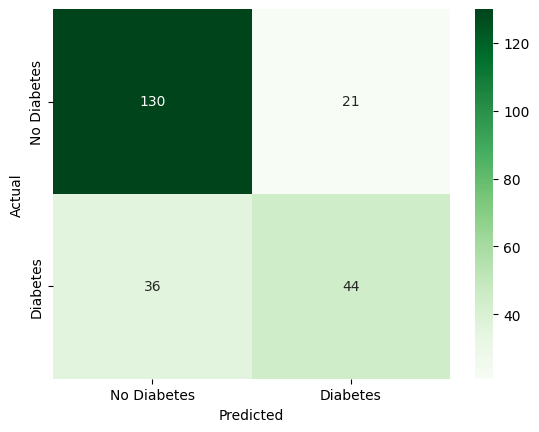

In [28]:
#Step 5: Evaluate Best Model
y_pred_best = best_dt.predict(x_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

# Confusion matrix for tuned model
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["No Diabetes","Diabetes"],
            yticklabels=["No Diabetes","Diabetes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In this project, we successfully applied a Decision Tree Classifier to the Diabetes Prediction problem using the Pima Indians Diabetes Dataset. Through exploratory data analysis, we identified Glucose, BMI, and Age as the most influential features for predicting diabetes. The model was trained, evaluated with multiple metrics (Accuracy, Precision, Recall, F1-score), and fine-tuned using hyperparameter optimization (GridSearchCV) to achieve better generalization.

The results demonstrated that Decision Trees provide a clear and interpretable model, where decision rules can be easily visualized and explained, making them particularly valuable in healthcare applications where explainability is critical. However, we also noted the limitations of Decision Trees, such as their tendency to overfit, and discussed strategies like pruning and ensemble methods (Random Forest, Gradient Boosting) to overcome this.

Overall, this project highlights the balance between model performance and interpretability, showing how Decision Trees can be a powerful first choice for medical diagnosis tasks while laying the foundation for more advanced ensemble techniques.

we can use the same dataset for more optimization usong random forest algorithm